# Task 1: Data Preparation

In [2]:
import numpy as np
import pandas as pd
data= pd.read_csv('Telco_Customer_Churn_Dataset.csv')

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [76]:
print(data.info)

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [5]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
mean_total_charges = data['TotalCharges'].mean()
data['TotalCharges'] = data['TotalCharges'].fillna(mean_total_charges)

In [8]:
cat_features = data.drop(['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure'],axis=1)
cat_features.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_cat = cat_features.apply(le.fit_transform)
data_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
X_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6607,7242-QZLXF,Male,0,No,Yes,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,25.30,25.30
2598,8325-QRPZR,Female,0,No,No,7,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,75.15,525.00
2345,7874-ECPQJ,Female,0,No,Yes,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.05,85.50
4093,2476-YGEFM,Female,0,No,No,29,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),76.00,2215.25
693,2276-YDAVZ,Female,0,No,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.10,270.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00
5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30
5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05
5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15


In [77]:
X_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.70
1807,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,4581-SSPWD,Female,0,No,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.80,246.30
2301,4813-HQMGZ,Female,0,Yes,No,8,Yes,Yes,Fiber optic,No,No,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,90.25,743.75
5121,4903-CNOZC,Male,0,No,No,29,Yes,Yes,DSL,No,Yes,Yes,No,No,Yes,One year,No,Credit card (automatic),70.90,1964.60
677,0822-GAVAP,Female,0,No,No,2,No,No phone service,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,34.70,62.25


In [78]:
y_train

6607    Yes
2598     No
2345     No
4093     No
693     Yes
       ... 
3772    Yes
5191     No
5226     No
5390    Yes
860      No
Name: Churn, Length: 5282, dtype: object

In [79]:
y_test

185     Yes
2715     No
3825     No
1807    Yes
132      No
       ... 
5845    Yes
2301     No
5121     No
677     Yes
6062     No
Name: Churn, Length: 1761, dtype: object

# Task 2: Exploratory Data Analysis (EDA)

No     5174
Yes    1869
Name: Churn, dtype: int64
 


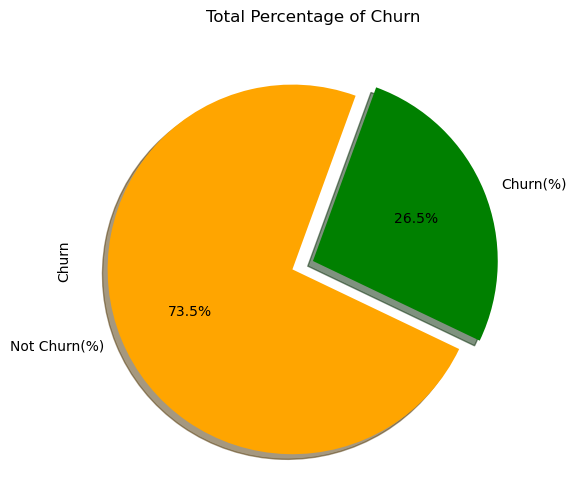

In [75]:
import matplotlib.pyplot as plt
# Chart - 1  Dependent Column Value Counts
print(data.Churn.value_counts())
print(" ")

# Dependent Variable Column Visualization
data['Churn'].value_counts().plot( kind='pie',figsize=(10,6),
                                        autopct="%1.1f%%",
startangle=70,
shadow=True,
labels=['Not Churn(%)','Churn(%)'],
colors=['orange','green'],explode=[0.12,0])
plt.title('Total Percentage of Churn')

# Displaying chart
plt.show()

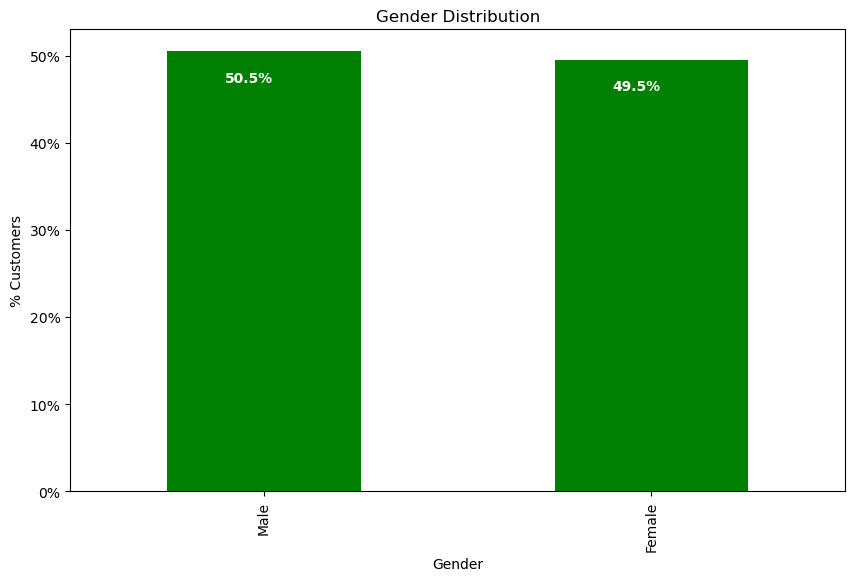

In [57]:
from pylab import rcParams
import matplotlib.ticker as mtick # For specifying the axes tick format 
rcParams['figure.figsize']=10,6

ax = (data['gender'].value_counts()*100.0 /len(data)).plot(kind='bar', stacked = True, rot = 90, color = 'green')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

totals = []  # creating a list to collect the plt.patches data

# finding the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)  # setting individual bar lables using above list

for i in ax.patches:
    # getting_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%', color='white', weight = 'bold')

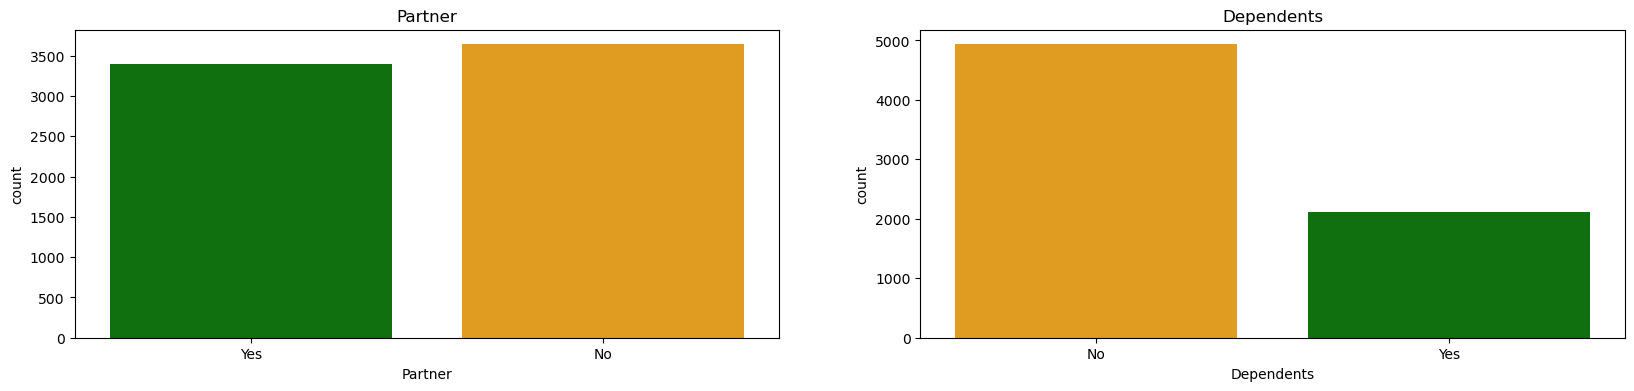

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

cols = ["Partner","Dependents"]
numerical = cols

plt.figure(figsize=(20,4))

for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(col), data=data, palette={"Yes": "green", "No": "orange"})
    ax.set_title(f"{col}")

C:\Users\snipe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Number of Customers by tenure')

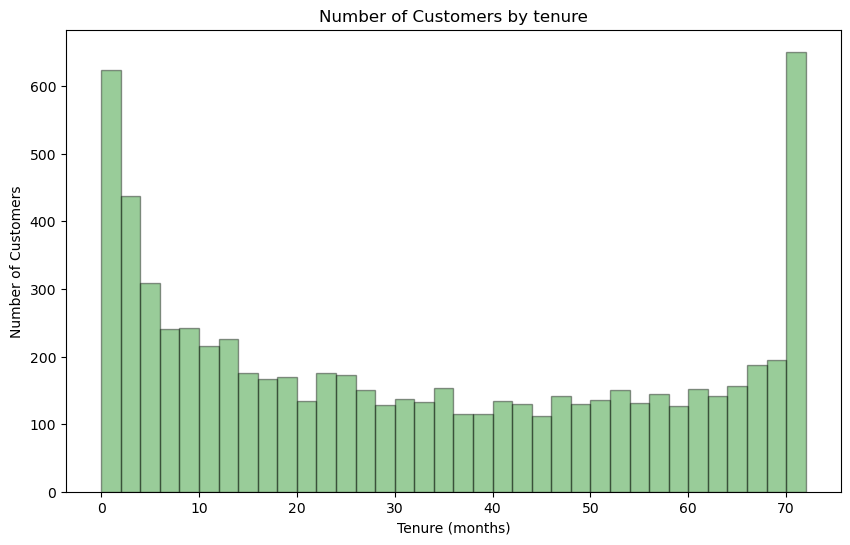

In [58]:
ax = sns.distplot(data['tenure'], hist=True, kde=False, 
             bins=int(180/5), 
             hist_kws={'edgecolor':'black', 'color':'green'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Number of Customers by tenure')

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

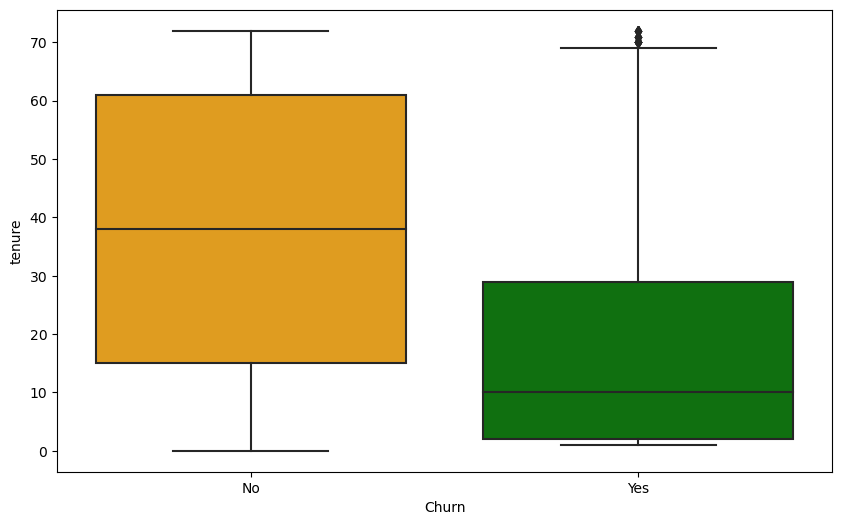

In [59]:
colors = {"Yes": "green", "No": "orange"}
sns.boxplot(x = data.Churn, y = data.tenure, palette = colors)

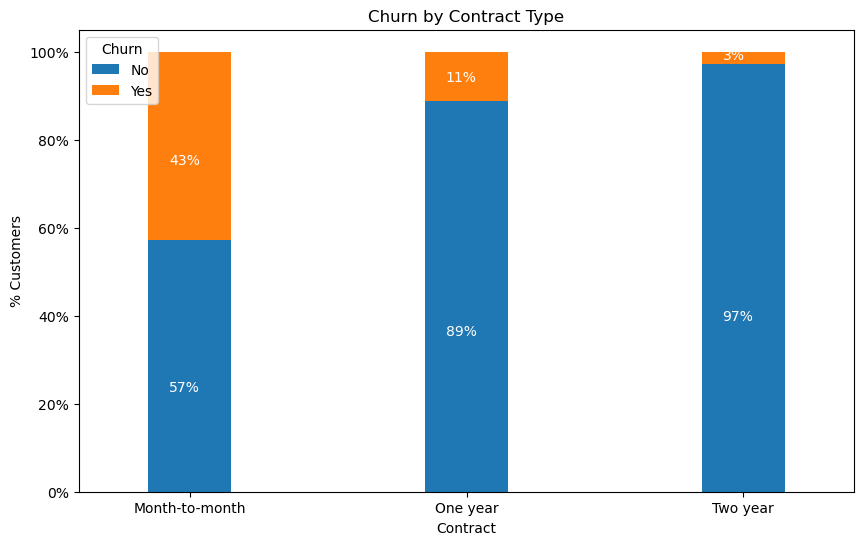

In [64]:
contract_churn = data.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0) 
                                                                
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Contract Type')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white')

In [65]:
import plotly.express as px
color_map = {'Electronic check': 'blue', 'Mailed check': 'green', 'Bank transfer (automatic)': 'red', 'Credit card (automatic)': 'orange'}
fig = px.histogram(data, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>",color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Task 3: Customer Segmentation

Text(0.5, 1.0, 'Two Year Contract')

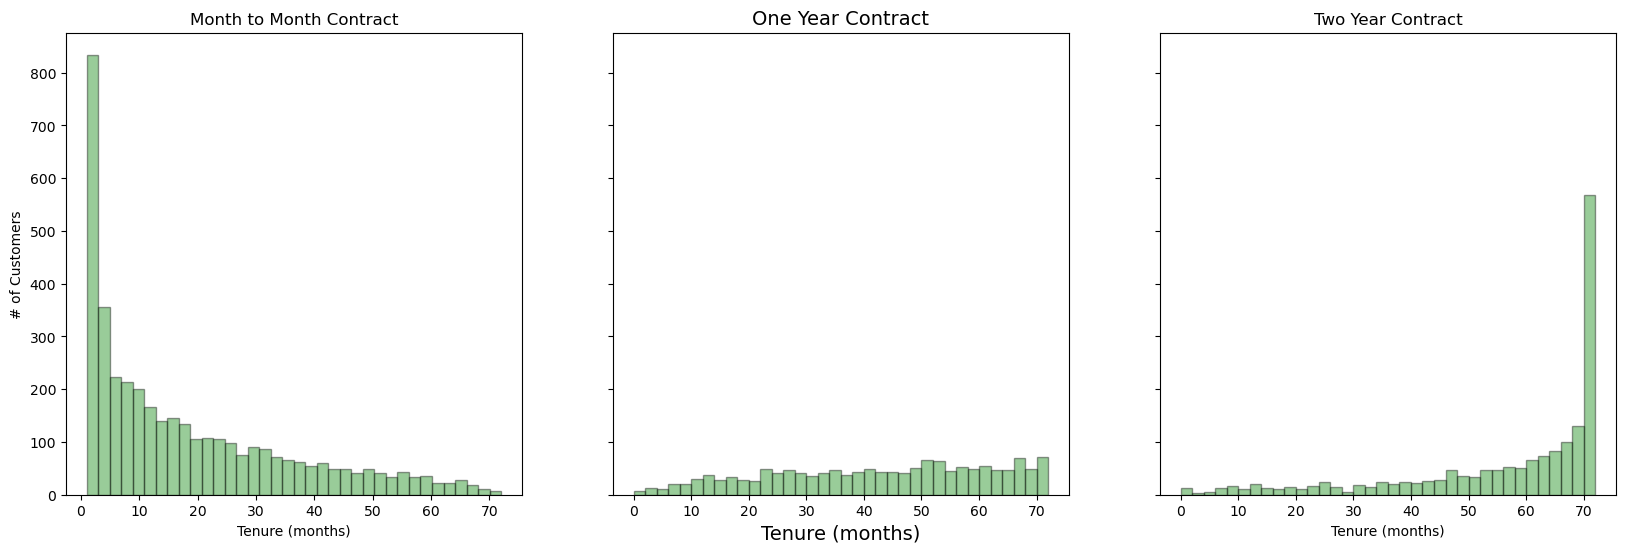

In [67]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(data[data['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5),
                   hist_kws={'edgecolor':'black','color':'green'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(data[data['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5),
                   hist_kws={'edgecolor':'black','color':'green'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(data[data['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5),
                   hist_kws={'edgecolor':'black','color':'green'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

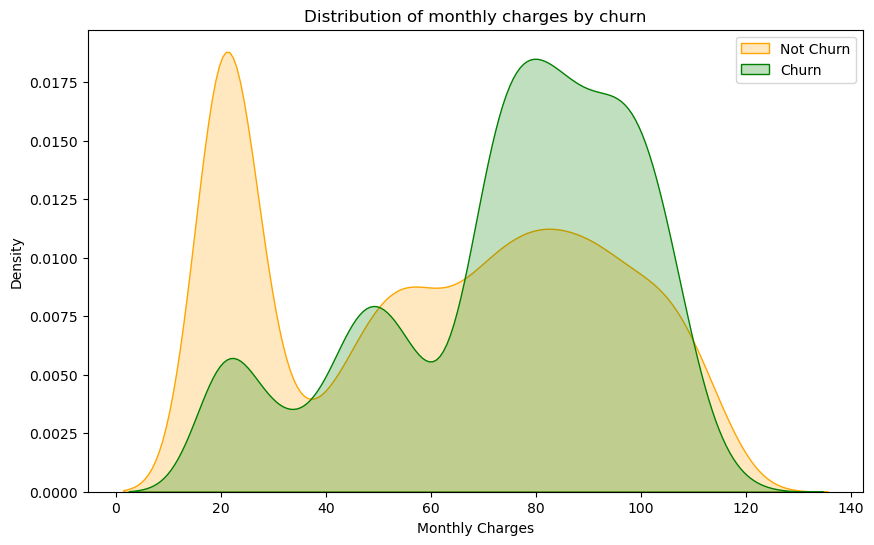

In [68]:
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No')], shade=True, color = 'orange')
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ], ax =ax, shade= True, color = 'green')
ax.legend(["Not Churn","Churn"], loc='best')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

In [21]:
high_value_customers=data[data['TotalCharges']>data['TotalCharges'].quantile(0.75)]
print(high_value_customers)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
12    8091-TTVAX    Male              0     Yes         No      58   
13    0280-XJGEX    Male              0      No         No      49   
15    3655-SNQYZ  Female              0     Yes        Yes      69   
17    9959-WOFKT    Male              0      No        Yes      71   
26    6467-CHFZW    Male              0     Yes        Yes      47   
...          ...     ...            ...     ...        ...     ...   
7023  1035-IPQPU  Female              1     Yes         No      63   
7028  9281-CEDRU  Female              0     Yes         No      68   
7034  0639-TSIQW  Female              0      No         No      67   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
12            Yes           Yes     Fiber optic             No  ...   
13            Yes

In [22]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

In [23]:
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Task 4: Churn Prediction Model

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import itertools


LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_encoded, y_train)  # Use encoded data here
y1_pred = LR.predict(X_test_encoded)
print("Logistic Regression")
accuracy1= accuracy_score(y_test, y1_pred)

print(f"Accuracy: {accuracy1:}")

DT = DecisionTreeClassifier()
DT.fit(X_train_encoded, y_train)  # Use encoded data here
y2_pred = DT.predict(X_test_encoded)
print("Decision Tree")
accuracy2 = accuracy_score(y_test, y2_pred)


print(f"Accuracy: {accuracy2:}")

C:\Users\snipe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression
Accuracy: 0.8143100511073254
Decision Tree
Accuracy: 0.7654741624077229


In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
cm= confusion_matrix(y_test,y1_pred)
cm

array([[1144,  138],
       [ 189,  290]], dtype=int64)

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

Confusion Matrix:
[[1144  138]
 [ 189  290]]


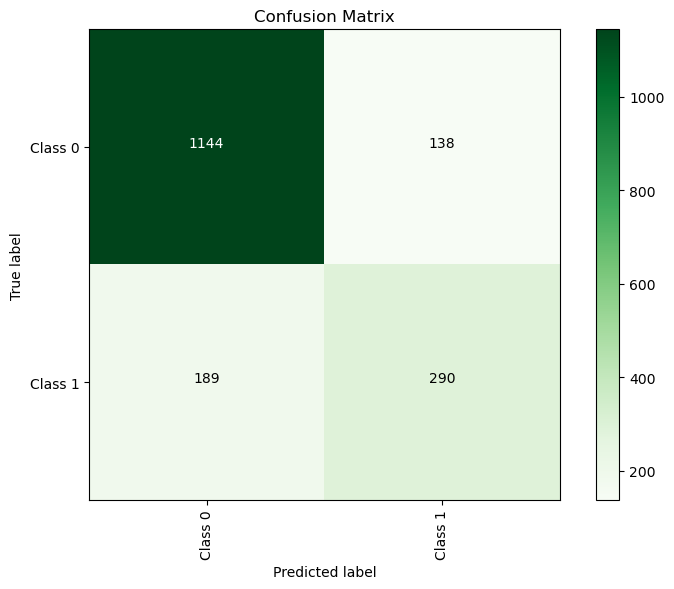

In [80]:
cm = confusion_matrix(y_test, y1_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)  # Number of classes
plt.xticks(tick_marks, ["Class 0", "Class 1"], rotation=90)
plt.yticks(tick_marks, ["Class 0", "Class 1"])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.grid(False)

# Labeling the squares
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

Confusion Matrix:
[[1115  167]
 [ 246  233]]


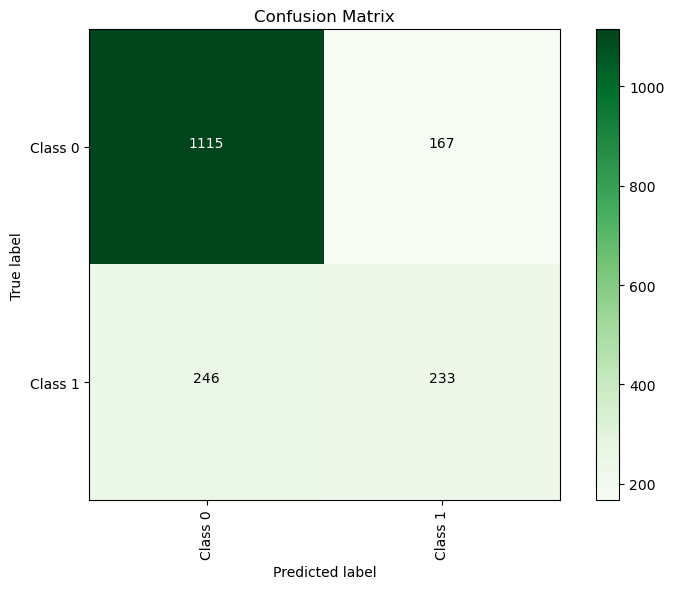

In [81]:
cm = confusion_matrix(y_test, y2_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)  # Number of classes
plt.xticks(tick_marks, ["Class 0", "Class 1"], rotation=90)
plt.yticks(tick_marks, ["Class 0", "Class 1"])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.grid(False)

# Labeling the squares
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import itertools

accuracy = accuracy_score(y_test, y1_pred)
precision = precision_score(y_test, y1_pred, average='binary',pos_label='Yes')  
recall = recall_score(y_test, y1_pred, average='binary',pos_label='Yes')  
f1 = f1_score(y_test, y1_pred, average='binary',pos_label='Yes')  

print("Logistic Regression:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Logistic Regression:
Accuracy: 0.81
Precision: 0.68
Recall: 0.61
F1 Score: 0.64


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import itertools

accuracy = accuracy_score(y_test, y2_pred)
precision = precision_score(y_test, y2_pred, average='binary',pos_label='Yes')  
recall = recall_score(y_test, y2_pred, average='binary',pos_label='Yes')  
f1 = f1_score(y_test, y2_pred, average='binary',pos_label='Yes')  

print("Decision Tree:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Decision Tree:
Accuracy: 0.77
Precision: 0.58
Recall: 0.49
F1 Score: 0.53


So Logistic Regression has better Accuracy

# Task 6: Business Recommendations

Actionable recommendations for reducing customer churn, some strategies based on data analysis and predictive modeling:

1) Segmentation and Customization:
Utilize customer segmentation based on usage patterns, demographics, and behavior to tailor marketing messages and offers. Personalized offers can increase customer engagement and loyalty.
Implement targeted marketing campaigns using predictive analytics to identify customers at risk of churn and offer them customized incentives to stay.
2) Proactive Customer Care:
Implement proactive customer support measures such as automated messages or calls to address potential issues before they lead to churn.
Offer self-service tools and resources to empower customers to troubleshoot common problems independently, reducing the need for direct support interactions.
3) Augmented Value Proposition:
Continuously evaluate and enhance the value proposition of your services to ensure they meet the evolving needs and expectations of your customers.
Introduce new features, services, or bundled offerings that differentiate your telecom company from competitors and increase perceived value.
4) Loyalty Incentives:
Implement loyalty programs that reward long-term customers with exclusive discounts, upgrades, or access to premium services.
Provide referral incentives to encourage satisfied customers to refer friends and family, expanding your customer base and increasing retention.
5) Insightful Data Analytics:
Invest in advanced analytics tools and machine learning algorithms to gain deeper insights into customer behavior and preferences.
Use predictive modeling to forecast future churn rates and identify actionable insights to proactively address potential churn drivers.
6) Multichannel Engagement:
Provide seamless omnichannel experiences across multiple touchpoints, including mobile apps, websites, social media, and customer service channels.
Implement personalized communication strategies that leverage the preferred channels and communication preferences of individual customers.